# Introduction about the Project

Cricket is a bat-and-ball game played between two teams of eleven players each on a cricket field, at the centre of which is a rectangular 20-metre (22-yard) pitch with a target at each end called the wicket (a set of three wooden stumps upon which two bails sit). Each phase of play is called an innings, during which one team bats, attempting to score as many runs as possible, whilst their opponents bowl and field, attempting to minimise the number of runs scored. When each innings ends, the teams usually swap roles for the next innings (i.e. the team that previously batted will bowl/field, and vice versa). The teams each bat for one or two innings, depending on the type of match. The winning team is the one that scores the most runs, including any extras gained (except when the result is not a win/loss result).

There are various formats ranging from Twenty20, played over a few hours with each team batting for a single innings of 20 overs, to Test matches, played over five days with unlimited overs and the teams each batting for two innings of unlimited length. Traditionally cricketers play in all-white kit, but in limited overs cricket they wear club or team colours.

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. In this project, the dataset is mainly consists of data from 2008 to 2016 all IPL matches.

### Quick overview of the dataset :

1. All Indian Premier League Cricket matches between 2008 and 2016.

2. This is the ball by ball data of all the IPL cricket matches till season 9.

3. The dataset contains 2 files: deliveries.csv and matches.csv.

4. matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

5. deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

### Objective 

 Predicting the winner of the next season of IPL based on past data, Visualizations, Perspectives, etc.

Importing packages or libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

There are two datasets:
matches.csv and deliveries.csv

Reading matches.csv dataset

In [3]:
matches_df_temp = pd.read_csv('matches.csv')
matches_df_temp.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Observing column data types and other info

In [4]:
matches_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


Dropping umpire3 column due to zero values available

In [5]:
matches_df = matches_df_temp.drop('umpire3', axis=1)
matches_df.fillna(0, inplace=True)
matches_df[:5]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0


In [6]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [7]:
deliveries_df_temp = pd.read_csv('deliveries.csv')
deliveries_df_temp.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
deliveries_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

Dropping 3 columns bcz column contains null values

In [9]:
deliveries_df = deliveries_df_temp.drop(['player_dismissed', 'dismissal_kind', 'fielder'], axis=1)
deliveries_df.fillna(0, inplace=True)
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


Finding top 10 scores in a match for particular innings

In [10]:
deliveries_df.groupby(['match_id', 'inning'])['total_runs'].sum().sort_values(ascending=False)[:10]

match_id  inning
411       1         263
620       1         248
206       1         246
61        1         240
562       1         235
296       1         232
486       1         231
259       1         231
50        1         230
580       1         227
Name: total_runs, dtype: int64

Most number of matches win in an entire ipl season

In [11]:
matches_df['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
0                               3
Name: winner, dtype: int64

Most wins by a team in year 2010

In [12]:
winner_df = matches_df.loc[:, ['season', 'winner']]
winner_2010_df = winner_df[winner_df['season'] == 2010]
winner_2010_df['winner'].value_counts()

Mumbai Indians                 11
Chennai Super Kings             9
Royal Challengers Bangalore     8
Deccan Chargers                 8
Delhi Daredevils                7
Kolkata Knight Riders           7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64

In [13]:
winner_2013_df = winner_df[winner_df['season'] == 2013]
winner_2013_df['winner'].value_counts()

Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
Name: winner, dtype: int64

Most number of toss winners in ipl

In [13]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [14]:
matches_df['toss_winner'] = matches_df['toss_winner'].str.replace('Supergiantss', 'Supergiant')

In [15]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Most number of player of match in ipl

In [16]:
matches_df['player_of_match'].value_counts().head()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
Name: player_of_match, dtype: int64

Most venues in ipl

In [17]:
matches_df['venue'].value_counts().head()

M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

Most extra runs given in a match

In [18]:
deliveries_df.groupby('match_id')['extra_runs'].sum().sort_values(ascending=False).head()

match_id
201    38
64     38
570    36
60     36
296    36
Name: extra_runs, dtype: int64

In [19]:
matches_df[matches_df['id'] == 201]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
200,201,2010,Mumbai,2010-03-30,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore


Replacing all team names with their abbreviations

In [20]:
matches_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [21]:
deliveries_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [22]:
matches_df['city'].nunique()

31

In [23]:
matches_df['umpire1'].nunique()

45

In [24]:
df = matches_df.loc[[matches_df['win_by_runs'].idxmax()]]
df[['season', 'team1', 'team2', 'winner', 'win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [25]:
df = matches_df.loc[[matches_df['win_by_wickets'].idxmax()]]
df[['season', 'team1', 'team2', 'winner', 'win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Most wins in history of ipl from 2008 to 2017

Text(0, 0.5, 'count of each team won')

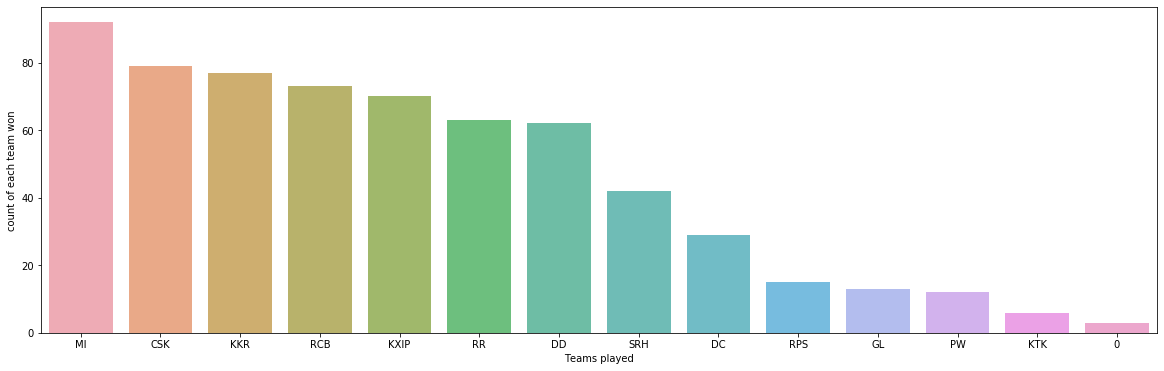

In [29]:
df = matches_df['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(df.index, df.values, alpha = 0.8)
plt.xlabel('Teams played')
plt.ylabel('count of each team won')

Most Player of match in entire ipl season

[Text(0, 0, 'CH Gayle'),
 Text(0, 0, 'YK Pathan'),
 Text(0, 0, 'AB de Villiers'),
 Text(0, 0, 'DA Warner'),
 Text(0, 0, 'SK Raina'),
 Text(0, 0, 'RG Sharma'),
 Text(0, 0, 'G Gambhir'),
 Text(0, 0, 'MS Dhoni'),
 Text(0, 0, 'AM Rahane'),
 Text(0, 0, 'MEK Hussey')]

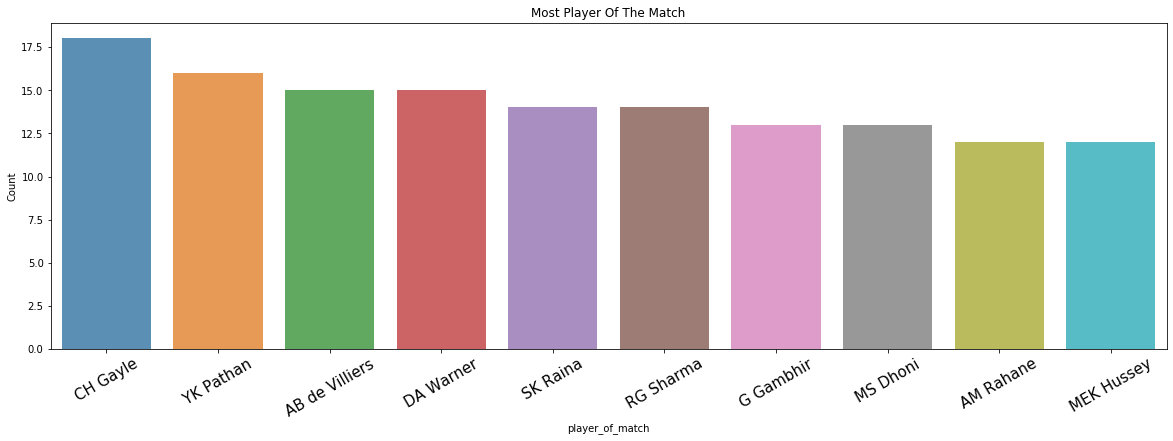

In [28]:
df = matches_df['player_of_match'].value_counts()
df = df[:10]
plt.figure(figsize=(20,6))
man_of_matches=sns.barplot(df.index, df.values, alpha=0.8)
plt.title('Most Player Of The Match')
plt.ylabel('Count')
plt.xlabel('player_of_match')
man_of_matches.set_xticklabels(rotation=30,labels=df.index,fontsize=15)

Matches Played across each season

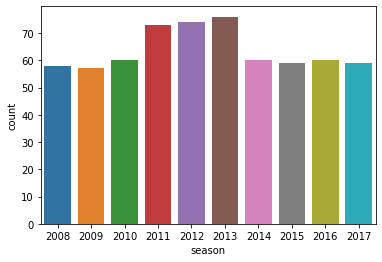

In [30]:
sns.countplot(x='season', data=matches_df)

Most favourite umpires in entire season

[Text(0, 0, 'HDPK Dharmasena'),
 Text(0, 0, 'S Ravi'),
 Text(0, 0, 'AK Chaudhary'),
 Text(0, 0, 'C Shamshuddin'),
 Text(0, 0, 'SJA Taufel'),
 Text(0, 0, 'M Erasmus'),
 Text(0, 0, 'Asad Rauf'),
 Text(0, 0, 'BR Doctrove'),
 Text(0, 0, 'RE Koertzen'),
 Text(0, 0, 'CK Nandan')]

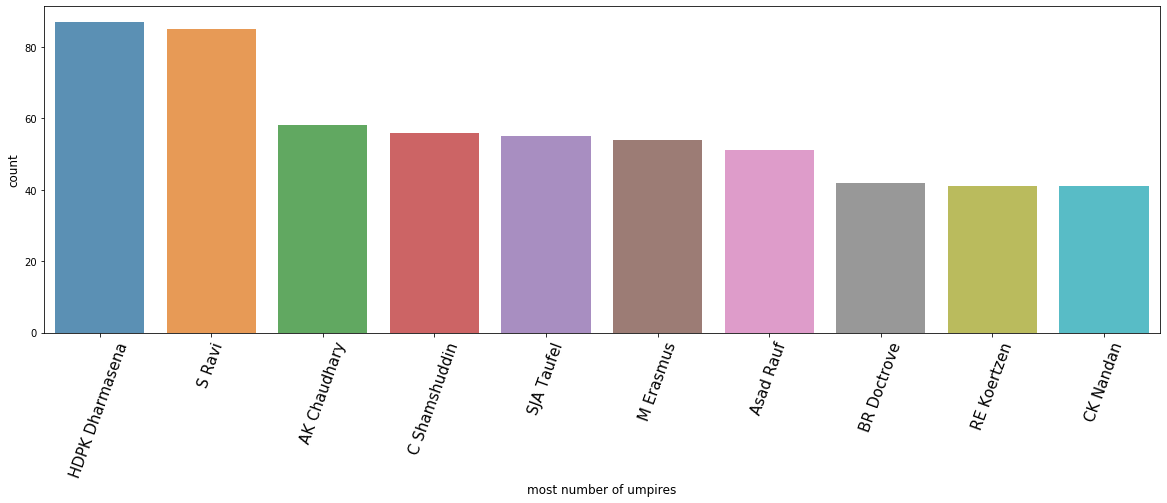

In [32]:
umpire_concat = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts().sort_values(ascending=False)
umpire_concat = umpire_concat[:10]
plt.figure(figsize=(20,6))
most_umpire = sns.barplot(umpire_concat.index, umpire_concat.values, alpha=0.8)
plt.xlabel('most number of umpires', fontsize=12)
plt.ylabel('count', fontsize=12)
most_umpire.set_xticklabels(rotation=70,labels=umpire_concat.index, fontsize=15)

Toss Decisions across each season

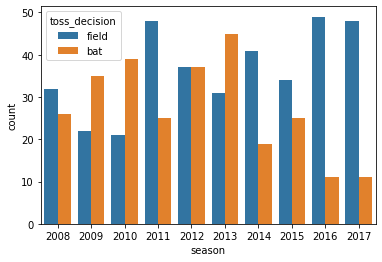

In [36]:
sns.countplot(x='season', hue='toss_decision', data=matches_df)

Toss Decisions

([<matplotlib.patches.Wedge at 0x26a03f7cac8>,
 [Text(-1.0729364863197453, -0.24250215735914496, 'bowling first'),
  Text(1.072936486319745, 0.2425021573591453, 'batting first')],
 [Text(-0.5852380834471337, -0.13227390401407904, '57.08%'),
  Text(0.5852380834471336, 0.13227390401407924, '42.92%')])

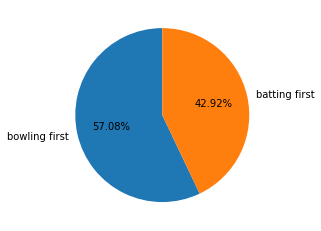

In [52]:
slices = matches_df['toss_decision'].value_counts()/636*100
label = ['bowling first', 'batting first']
plt.pie(slices, labels=label, startangle=90, autopct='%1.2f%%')

Eden Gardens analysis

([<matplotlib.patches.Wedge at 0x26a05259588>,
 [Text(-1.0561648497138825, 0.30743423724245866, 'Batting first'),
  Text(1.0561648497138825, -0.3074342372424588, 'Batting Second')],
 [Text(-0.5760899180257539, 0.16769140213225014, '40.98%'),
  Text(0.5760899180257539, -0.16769140213225023, '59.02%')])

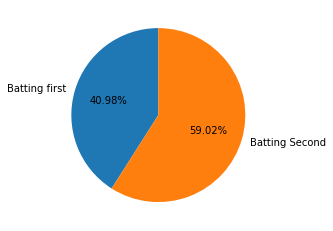

In [59]:
Kolkata_match = matches_df.loc[(matches_df['venue'] == 'Eden Gardens')]
Kolkata_match_win_by_runs = Kolkata_match[Kolkata_match['win_by_runs'] > 0]
slices = [len(Kolkata_match_win_by_runs),len(Kolkata_match)-len(Kolkata_match_win_by_runs)]
labels = ['Batting first','Batting Second']
plt.pie(slices,labels=labels, startangle=90, autopct='%1.2f%%')

Chennai Analysis

([<matplotlib.patches.Wedge at 0x26a0529e198>,
 [Text(-1.0162674857624157, -0.42095177560159863, 'Batting first'),
  Text(1.0162674857624154, 0.42095177560159897, 'Batting Second')],
 [Text(-0.5543277195067721, -0.22961005941905377, '62.50%'),
  Text(0.5543277195067721, 0.22961005941905396, '37.50%')])

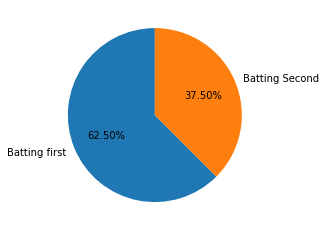

In [60]:
Chennai_match = matches_df.loc[(matches_df['venue'] == 'MA Chidambaram Stadium, Chepauk')]
Chennai_match_win_by_runs = Chennai_match[Chennai_match['win_by_runs'] > 0]
slices = [len(Chennai_match_win_by_runs),len(Chennai_match)-len(Chennai_match_win_by_runs)]
labels = ['Batting first','Batting Second']
plt.pie(slices,labels=labels, startangle=90, autopct='%1.2f%%')

Analysis in year 2017:
In 2017 if a team won the toss they had slightly better chances to win the match

([<matplotlib.patches.Wedge at 0x26a05582198>,
 [Text(-1.0685728908766525, -0.2610593359439841, 'win'),
  Text(1.0685728908766525, 0.26105933594398445, 'lost')],
 [Text(-0.582857940478174, -0.1423960014239913, '57.63%'),
  Text(0.582857940478174, 0.1423960014239915, '42.37%')])

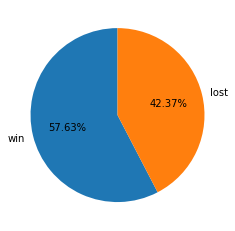

In [75]:
matches_2017 = matches_df[matches_df['season'] == 2017]
toss_by_winner = matches_2017[matches_2017['toss_winner'] == matches_2017['winner']]
slices = [len(toss_by_winner), (59-len(toss_by_winner))]
labels = ['win', 'lost']
plt.pie(slices, labels=labels, startangle=90, autopct='%1.2f%%')

Teams winning toss in 2017 majorly decide to Field first.

([<matplotlib.patches.Wedge at 0x26a055c8f60>,
 [Text(-0.6080800675334552, 0.916645313885643, 'bat'),
  Text(0.6080799817109247, -0.9166453708182034, 'bowl')],
 [Text(-0.33168003683643005, 0.49998835302853245, '18.64%'),
  Text(0.33167999002414067, -0.49998838408265633, '81.36%')])

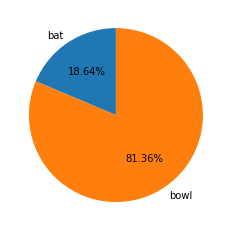

In [81]:
df = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['season'] == 2017)]
slices = [59-len(df), len(df)]
labels = ['bat', 'bowl']
plt.pie(slices, labels=labels, startangle=90, autopct='%1.2f%%')

Sides Fielding Second Side Won More Matches in 2017

([<matplotlib.patches.Wedge at 0x26a05611ba8>,
 [Text(-1.096493205923272, 0.08776473872863456, 'Fielding First Side Won'),
  Text(1.0964931977061392, -0.08776484138973775, 'Fielding Second Side Won')],
 [Text(-0.5980872032308755, 0.04787167567016431, '47.46%'),
  Text(0.5980871987488031, -0.04787173166712968, '52.54%')])

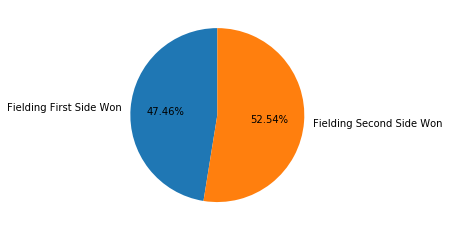

In [82]:
df = matches_2017[(matches_2017['toss_decision']=='field') & (matches_2017['toss_winner']==matches_2017['winner'])]
labels = ['Fielding First Side Won','Fielding Second Side Won']
slices = [len(df),59-len(df)]
plt.pie(slices, labels=labels, startangle=90, autopct='%1.2f%%')

Toss Decision across each season

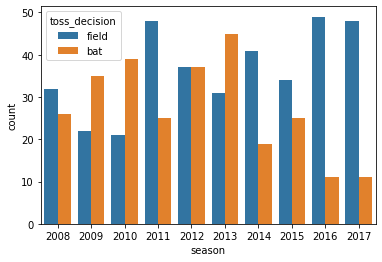

In [83]:
sns.countplot(x='season',hue='toss_decision',data=matches_df)

Maximum Toss winners

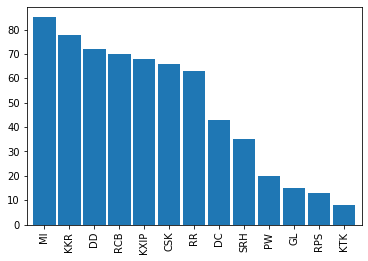

In [91]:
max = matches_df['toss_winner'].value_counts()
max.plot.bar(width=0.9)

Total runs across each season

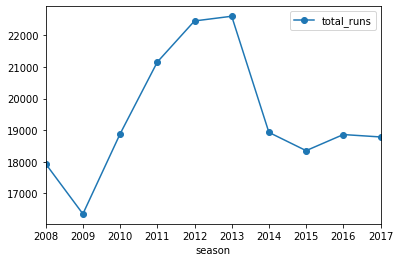

In [12]:
runs = matches_df[['id', 'season']].merge(deliveries_df, left_on='id', right_on='match_id', how='left').drop('id', axis = 1)
season = runs.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')

Sixes and fours across the season

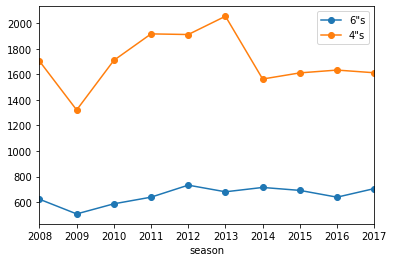

In [13]:
Season_boundaries = runs.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a = runs.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries = Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries = Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')

Runs Per Over By Teams Across Seasons

In [14]:
deliveries_df.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,684,482,931,209,909,103,999,873,264,713,91,72,918,485
2,944,614,1124,226,1057,96,1093,1038,301,740,102,98,1007,553
3,1020,566,1140,294,1144,115,1153,1153,357,848,146,104,1210,602
4,1086,571,1192,269,1228,126,1198,1251,329,936,139,107,1184,591
5,1140,586,1209,267,1229,97,1180,1265,316,874,152,110,1171,631
6,1147,598,1069,294,1287,143,1132,1366,328,954,155,147,1138,639
7,909,472,1049,259,990,89,985,1013,246,776,92,106,935,492
8,970,539,1010,249,1130,86,965,1063,317,826,88,113,1117,493
9,980,519,1095,242,1093,88,1010,1111,296,873,92,111,1192,545


Text(0, 0.5, 'total runs scored')

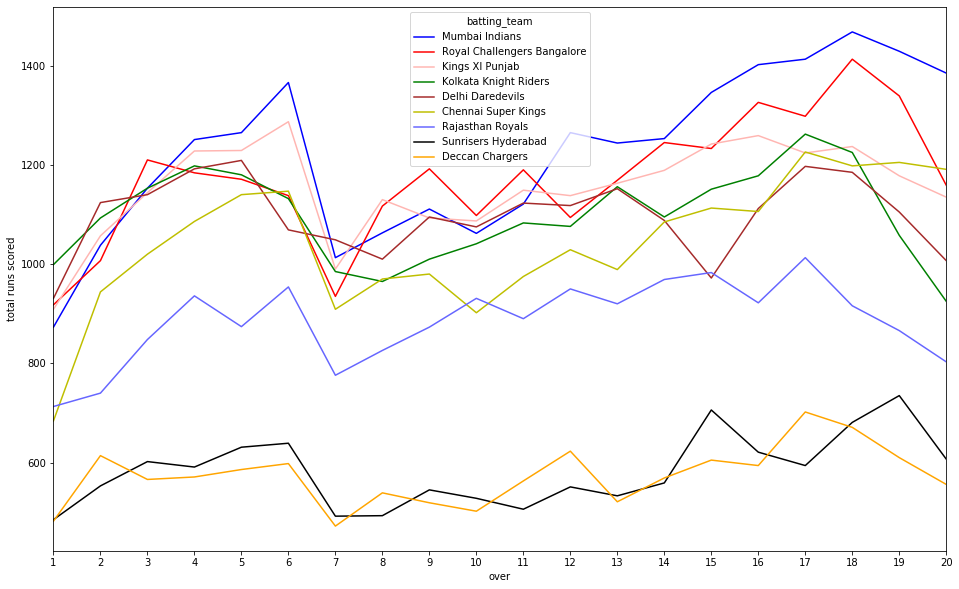

In [20]:
matches_played_byteams = pd.concat([matches_df['team1'],matches_df['team2']])
matches_played_byteams = matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns = ['Team','Total Matches']
matches_played_byteams['wins'] = matches_df['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
runs_per_over = deliveries_df.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.xticks(x)
plt.ylabel('total runs scored')